**Overview: A synthetic dataset is generated using scikit-learn's blob generator. A soft margin SVM has been implemented along with mini batch gradient descent. 3D boundary is generated so visualize the boudnary data.**

In [3]:
import numpy as np
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_classification

**Generate the dataset**

In [4]:
X, y = make_classification(n_samples=500, n_features=3, n_informative=3,
                           n_redundant=0, n_clusters_per_class=1,
                           flip_y=0.1,  # adds a small amount of noise
                           class_sep=1.0,  # classes are separable but not too easily
                           random_state=40)

In [5]:
X,y

(array([[-4.61464665, -3.2264618 ,  4.54404187],
        [ 0.44579932,  1.34683696,  0.6670701 ],
        [ 0.74616408,  0.36654281, -0.95794423],
        ...,
        [ 1.55322678, -0.05594705,  0.15149332],
        [-1.1087264 , -0.96182012, -0.08996034],
        [ 0.91602176,  1.53813433,  1.07871276]]),
 array([1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
        1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
        1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
        1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
        1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
        0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
        1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
        1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
        0, 0, 0, 0, 0, 0,

**1. Relabel the Y targets to +1/-1**

In [6]:
y = np.where(y <= 0, -1, 1)

In [7]:
y

array([ 1, -1,  1,  1, -1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1, -1,  1,
        1,  1, -1,  1, -1,  1, -1, -1,  1,  1,  1,  1, -1, -1,  1,  1, -1,
       -1, -1,  1, -1, -1, -1, -1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1, -1, -1, -1,  1, -1,  1,  1, -1, -1,  1, -1,  1, -1,  1,  1,
        1, -1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1, -1,  1, -1,  1,
       -1, -1, -1,  1,  1, -1,  1,  1,  1, -1, -1, -1, -1,  1,  1, -1, -1,
        1, -1, -1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1, -1,  1, -1,  1,
        1, -1,  1, -1, -1, -1, -1,  1, -1,  1, -1,  1,  1,  1,  1, -1,  1,
        1, -1,  1, -1, -1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1, -1, -1,
        1,  1,  1, -1,  1, -1, -1, -1, -1,  1,  1,  1,  1, -1,  1,  1, -1,
        1,  1, -1,  1,  1, -1,  1, -1, -1, -1, -1,  1,  1,  1, -1,  1, -1,
       -1, -1,  1,  1, -1, -1,  1,  1, -1,  1,  1, -1, -1, -1, -1, -1, -1,
       -1,  1,  1, -1, -1, -1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1,
        1, -1,  1, -1,  1

**2. Split the dataset into training and testing datasets**

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)
print(f"shape of X_train is:{X_train.shape}")
print(f"shape of X_test is:{X_test.shape}")
print(f"shape of y_train:{y_train.shape}")
print(f"shape of y_test is:{y_test.shape}")

shape of X_train is:(400, 3)
shape of X_test is:(100, 3)
shape of y_train:(400, 1)
shape of y_test is:(100, 1)


**3. Implement Soft Margin SVM**

In [35]:
class svm:
    def __init__(self,learning_rate=0.001,iteration=1000,batch_size=100,C=1):
        self.learning_rate = learning_rate
        self.iteration = iteration 
        self.batch_size = batch_size
        self.weight = None
        self.bias = 0
        self.C = C
        self.losses = []
        

    def fit(self,X,y):
        m,n = X.shape
        self.weight = np.zeros((n,1))
        self.bias = 0
        for epoch in range(self.iteration):
            X_shuffle,y_shuffle = shuffle(X,y)
            for i in range(0, m, self.batch_size):
                X_batch = X_shuffle[i:i + self.batch_size]
                y_batch = y_shuffle[i:i + self.batch_size]
                dw, db = self.compute_gradients(X_batch, y_batch)
                self.weight -= self.learning_rate * dw
                self.bias -= self.learning_rate * db
            loss = self.compute_loss(X,y)
            self.losses.append(loss)
    
    def compute_gradients(self, X_batch, y_batch): 
        n = X_batch.shape[0]
        t = y_batch * (X_batch @ self.weight + self.bias)
        hinge_loss = np.maximum(0,1-t)
        hinge_mask = (hinge_loss > 0).astype(int)
        dw = -self.C * np.sum(y_batch * X_batch * hinge_mask, axis=0).reshape(-1, 1)
        db = -self.C * np.sum(y_batch * hinge_mask)
        dw /= n
        db /= n
        dw += self.weight
        return dw,db

    def compute_loss(self,X,y):
        m = X.shape[0]
        t = y * (X @ self.weight + self.bias)
        hinge_loss = np.mean(np.maximum(0, 1-t))
        reg_loss = 0.5 * np.sum(self.weight ** 2)
        total_loss = self.C * hinge_loss + reg_loss
        return total_loss
        
    def predict(self,X):
        scores = X @ self.weight + self.bias
        return np.where(scores >= 0, 1, -1)

    def get_weights(self):
        return self.weight,self.bias 

In [36]:
model = svm()
model.fit(X_train,y_train)
weight,bias = model.get_weights()
print(f"Optimal weights is: {weight}")
print(f"Optimal bias is:{bias}")
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy * 100:.2f}%")
y_pred_train = model.predict(X_train)
accuracy1 = accuracy_score(y_train,y_pred_train)
print(f"Train Accuracy: {accuracy1 * 100:.2f}%")

Optimal weights is: [[-0.31842773]
 [-0.40619846]
 [-0.05773   ]]
Optimal bias is:-0.09424000000000021
Test Accuracy: 82.00%
Train Accuracy: 86.00%


**Visualize the training data and decision boundary in 3D**

In [39]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),np.arange(y_min, y_max, 0.02))
zz = (-bias - weight[0] * xx - weight[1] * yy) / weight[2]

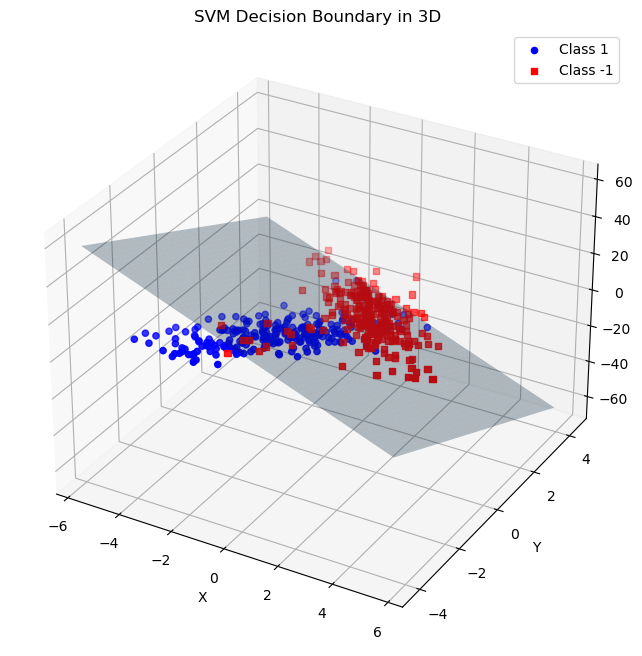

In [40]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[y == 1][:, 0], X[y == 1][:, 1], X[y == 1][:, 2], c='b', marker='o', label='Class 1')
ax.scatter(X[y == -1][:, 0], X[y == -1][:, 1], X[y == -1][:, 2], c='r', marker='s', label='Class -1')

ax.plot_surface(xx, yy, zz, alpha=0.3)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
ax.set_title('SVM Decision Boundary in 3D')

plt.show()

**Visualize the loss function over time during training**

In [43]:
def plot_loss(model):
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(model.losses) + 1), model.losses)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('SVM Loss over Training Epochs')
    plt.grid(True)
    plt.show()

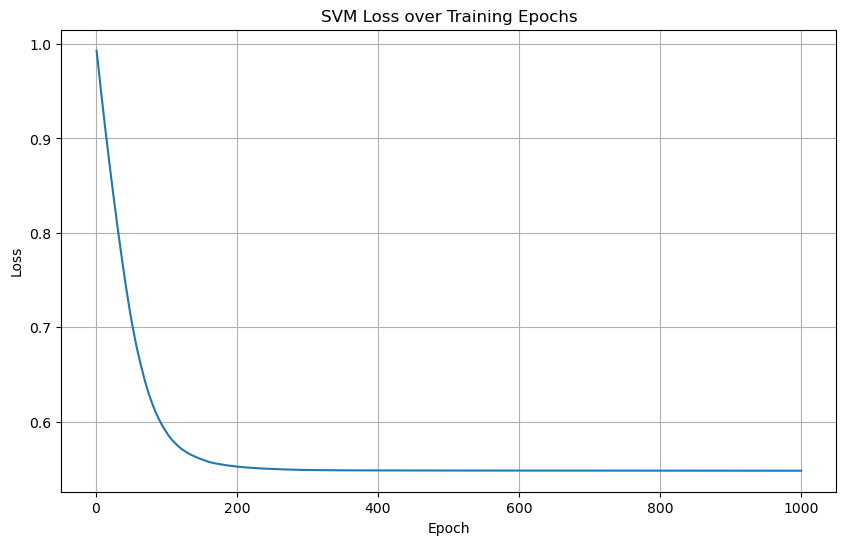

In [44]:
plot_loss(model)